In [9]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [10]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [11]:
print(train_data.columns.values)
train_data.describe()
train_data.describe(include=['O'])

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


Text(0.5, 1.0, 'combine')

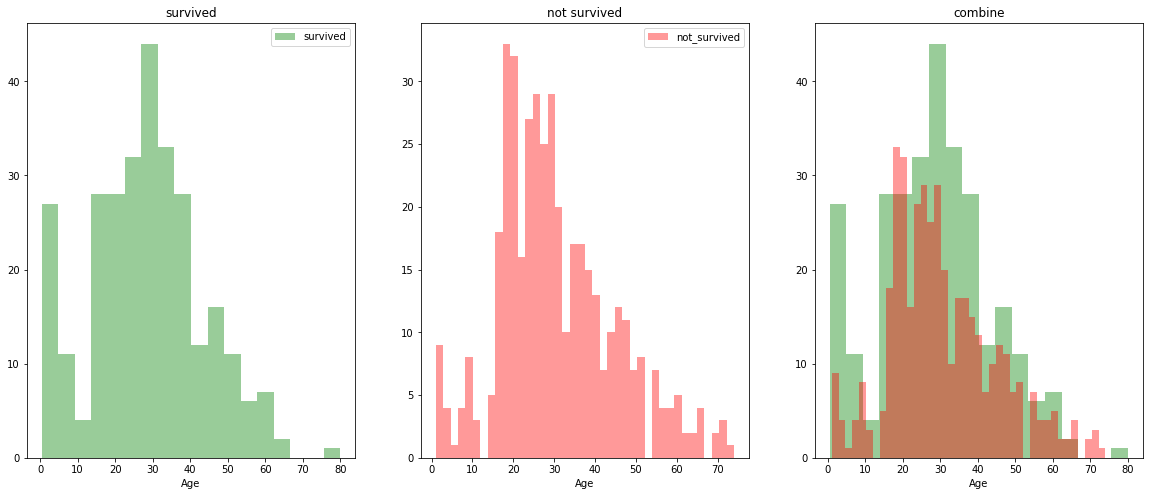

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 8))
ax = sns.distplot(train_data[train_data['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[0], kde =False, color="green")
ax.legend()
ax.set_title('survived')
ax = sns.distplot(train_data[train_data['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[1], kde = False, color="red")
ax.legend()
ax.set_title('not survived')
ax = sns.distplot(train_data[train_data['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[2], kde =False, color="green")
ax = sns.distplot(train_data[train_data['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[2], kde = False, color="red")
ax.set_title('combine')

1. Young passengers had high survival rate, and old passengers had low survival rate.
2. Most passengers are in 15-35 age range, and many passengers in this range did not survive.

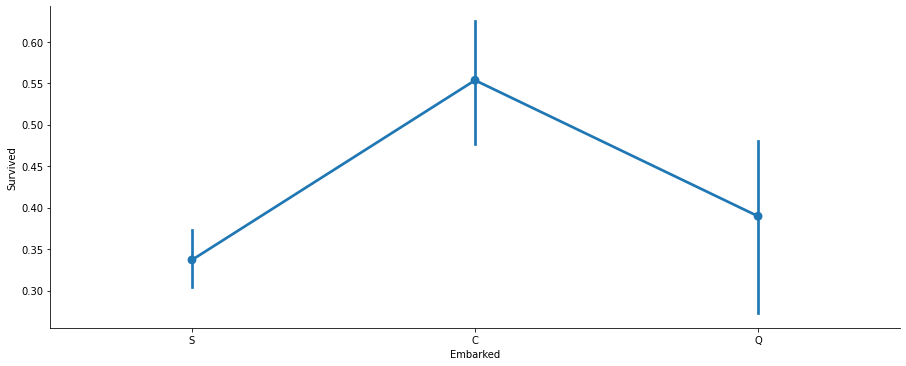

In [13]:
sns.factorplot('Embarked','Survived', data=train_data, aspect = 2.5)

Passengers from port ‘Southampton’ have a low survival rate of 34%, from the port ‘Cherbourg’ have a survival rate of 55%, from the port ‘Queenstown’ have a survival rate of 39%

In [14]:

train_data = train_data.drop('Ticket', axis=1)
test_data = test_data.drop('Ticket', axis=1)

ticket number is random, so we drop this column

In [15]:
combine = [train_data, test_data]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir','Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Certain titles mostly survived or did not

In [16]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

# Pclass

In [17]:
print(train_data[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


People with higher tier of class are more likely to survived with 20 percent difference within adjacent tiers. 

# SibSp

In [18]:
print(train_data[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean())

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


People who traveled with 1 or 2 siblings or spouse are higher rate of survival compare to people who travled with 3 sibsp or more. People who traveled alone (sibsp + parch = 0) have survival rate over than one third.

# Fare

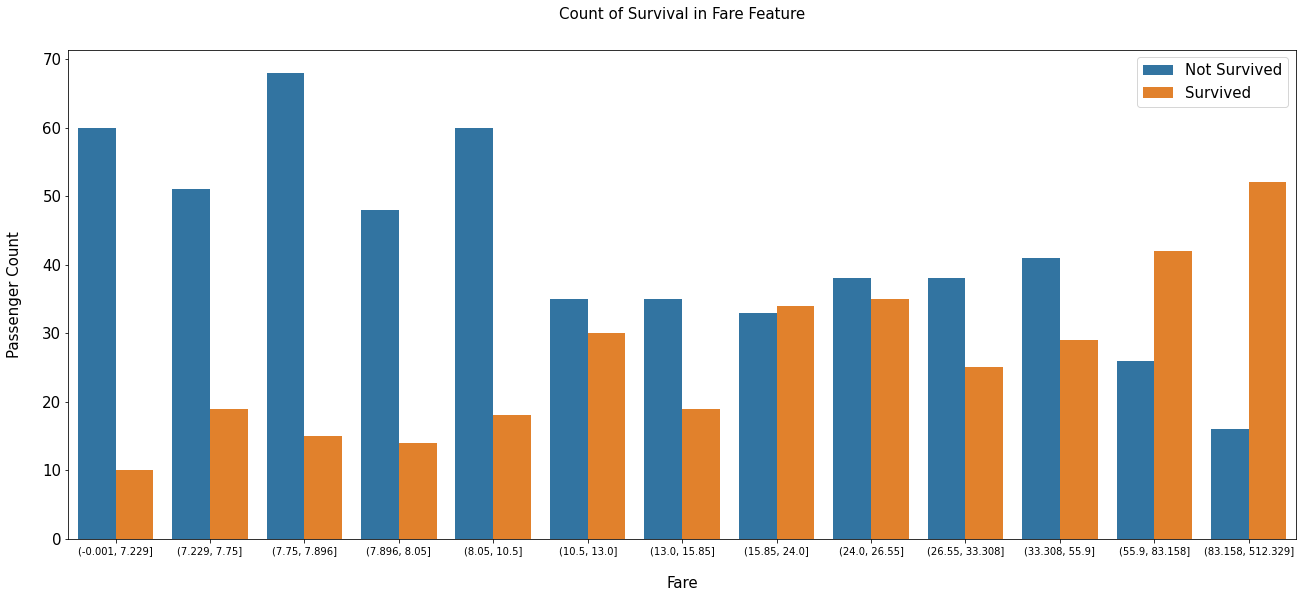

In [19]:
data1 = pd.read_csv('./data/train.csv')
data1['Fare'] = pd.qcut(data1['Fare'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=data1)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

People in the group of higher fare have higher rate of survival compare to people with lower fare, this indicates either of two things, people travel with family or having an expensive cabin are more likely to survive.

# Cabin

In [20]:
cabinisnull = train_data['Cabin'].isnull().sum()
cabinnotnull = train_data['Cabin'].count()
totalnum = train_data['PassengerId'].count()
print(cabinisnull/totalnum)
print(cabinnotnull/totalnum)
print(cabinisnull)
print(totalnum)

0.7710437710437711
0.22895622895622897
687
891


In [21]:
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

The Cabin data has too much null (687 out of 891 rows, about 77%) that it might not be good feature. However, it can help craft other features.  

In [22]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_data = train_data.drop(['Name', 'PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


We can drop name and passengerID

# Sex

In [23]:
train_data['isMale'] = 1
train_data['isMale'].loc[train_data['Sex']=='female'] = 0
train_data['isFemale'] = 1
train_data['isFemale'].loc[train_data['Sex']=='male'] = 0

In [24]:
male = train_data.loc[train_data.Sex == 'male']['Survived']
female = train_data.loc[train_data.Sex == 'female']['Survived']
malesurrate = sum(male)/len(male)
femalesurrate = sum(female)/len(female)
print(sum(male))
print(len(male))
print(malesurrate)
print(sum(female))
print(len(female))
print(femalesurrate)

109
577
0.18890814558058924
233
314
0.7420382165605095


Sex has high correlation (+-0.543) with survival in the training data set, which means gender may be a strong factor alone.  
Women have survival rate 0.7420382165605095, while men have much lower survival rate  0.18890814558058924  


| Gender\Number | Total | Survived | Survival Rate |
| ------------- | ----- | -------- | ------------- |
|     Women          |314|233|74.20%|
| Men         | 577  | 109     |18.89%|

# Parch

In [25]:
train_data.value_counts(['Parch'])
parchsur = list()
parchstat = list()
for i in range(0,7):
  parchsur.append(train_data.loc[train_data.Parch == i]['Survived'])
  parchstat.append((sum(parchsur[i]), len(parchsur[i])))

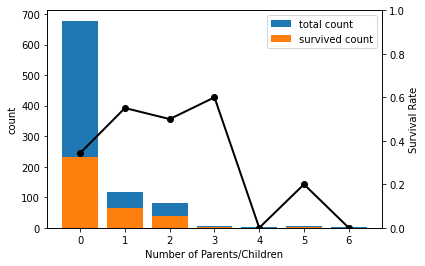

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure()        
host =  fig.add_subplot(111) 
par2 = host.twinx()
x = (0,1,2,3,4,5,6)
y = [x[0] for x in parchstat] 
y2 = [x[1] for x in parchstat] 
yy = [x[0]/x[1] for x in parchstat]
host.bar(x,y2,align='center',label='total count')
host.bar(x,y,align='center',label='survived count') 
par2.plot(x, yy, linewidth=2, marker='o', color = 'black', label='survival rate')
host.legend(loc = 'upper right')
par2.set_ylim(0,1)
host.set_ylabel("count")
par2.set_ylabel("Survival Rate")
host.set_xlabel('Number of Parents/Children')
plt.show()

Parch describe number of one's parents/children, range from 0 to 6.  
The relation to the survival rate shown in the plot.  
detail:


| Parch         | 0     | 1     | 2     | 3     | 4    | 5     | 6    |
| ------------- | ----- | ----- | ----- | ----- | ---- | ----- | ---- |
| Total         | 678   | 118   | 80    | 5     | 4    | 5     | 1    |
| Survived      | 233   | 65    | 40    | 3     | 0    | 1     | 0    |
| Survival Rate | 34.3% | 55.0% | 50.0% | 60.0% | 0.0% | 20.0% | 0.0% |

# Family&Single  
Family is simply Parch+Sibsp, and isSingle is family=0.

In [27]:
train_data['Family']=0
train_data['Family']=train_data.Parch + train_data.SibSp
train_data['isSingle']=0
train_data['isSingle'].loc[train_data.Family==0] = 1
train_data.value_counts(['Family'])

Family
0         537
1         161
2         102
3          29
5          22
4          15
6          12
10          7
7           6
dtype: int64

In [28]:
train_data.value_counts(['Family'])
Fsur = list()
Fstat = list()
for i in range(0,11):
  Fsur.append(train_data.loc[train_data.Family == i]['Survived'])
  Fstat.append((sum(Fsur[i]), len(Fsur[i])))
print([x[1] for x in Fstat] )

[537, 161, 102, 29, 15, 22, 12, 6, 0, 0, 7]


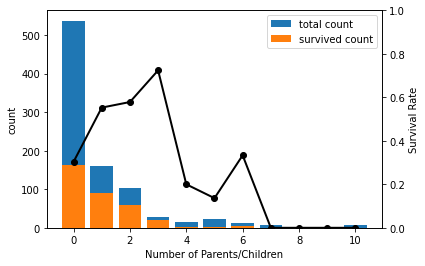

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure()        
host =  fig.add_subplot(111) 
par2 = host.twinx()
x = (0,1,2,3,4,5,6,7,8,9,10)
y = [x[0] for x in Fstat] 
y2 = [x[1] for x in Fstat] 
yy = list()
for ii in Fstat:
  if ii[0]!=0:
    yy.append(ii[0]/ii[1])
  else:
    yy.append(0)
host.bar(x,y2,align='center',label='total count')
host.bar(x,y,align='center',label='survived count') 
par2.plot(x, yy, linewidth=2, marker='o', color = 'black', label='survival rate')
host.legend(loc = 'upper right')
par2.set_ylim(0,1)
host.set_ylabel("count")
par2.set_ylabel("Survival Rate")
host.set_xlabel('Number of Parents/Children')
plt.show()

In [30]:
train_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,isMale,isFemale,Family,isSingle
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.407753,-0.543351,0.543351,0.016639,-0.203367
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.173929,0.131900,-0.131900,0.065997,0.135207
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.104766,0.093254,-0.093254,-0.301914,0.198270
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.269623,-0.114631,0.114631,0.890712,-0.584471
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.315784,-0.245489,0.245489,0.783111,-0.583398
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.136310,-0.182333,0.182333,0.217138,-0.271832
Title,0.407753,-0.173929,-0.104766,0.269623,0.315784,0.136310,1.000000,-0.502713,0.502713,0.342039,-0.405813
isMale,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-0.502713,1.000000,-1.000000,-0.200988,0.303646
isFemale,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,0.502713,-1.000000,1.000000,0.200988,-0.303646
Family,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,0.342039,-0.200988,0.200988,1.000000,-0.690922


In [31]:
singlesur =  train_data.loc[train_data.isSingle==1]['Survived']
nsinglesur = train_data.loc[train_data.isSingle==0]['Survived']
ssrate = sum(singlesur)/len(singlesur)
nsrate = sum(nsinglesur)/len(nsinglesur)
print(ssrate)
print(nsrate)

0.30353817504655495
0.5056497175141242


The correlation with survived is not higher using Family, but is higher using isSingle(-0.2).  
People had no other family member had lower survival rate (0.303), while others had higher (0.505).  

In [32]:
test_data['isMale'] = 1
test_data['isMale'].loc[train_data['Sex']=='female'] = 0
test_data['isFemale'] = 1
test_data['isFemale'].loc[train_data['Sex']=='male'] = 0
test_data['Family']=0
test_data['Family']=train_data.Parch + train_data.SibSp
test_data['isSingle']=0
test_data['isSingle'].loc[train_data.Family==0] = 1

In [33]:
freq_port = train_data.Embarked.dropna().mode()[0]
combine = [train_data, test_data]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

<AxesSubplot:>

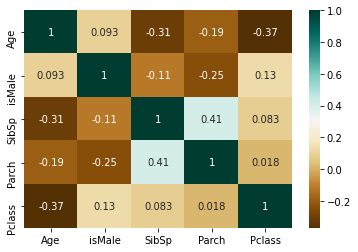

In [34]:
sns.heatmap(train_data[["Age","isMale","SibSp","Parch","Pclass"]].corr(),cmap="BrBG",annot=True)

Age is negatively correlated with Pclass and SibSp.

In [35]:
guess_ages = np.zeros((9,3))
for dataset in combine:
    for i in range(0, 9):
        for j in range(0, 3):
            guess_df = dataset[(dataset['SibSp'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            if np.isnan(age_guess):
                continue
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5           
    for i in range(0, 9):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.SibSp == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
combine = [train_data, test_data]

In [36]:
train_data['Embarked'] = train_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_data['Embarked'] = test_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_data = train_data.drop(['Sex'], axis=1)
test_data = test_data.drop(['Sex'], axis=1)
combine = [train_data, test_data]

In [37]:
for dataset in combine:
    dataset['Fare'].fillna(dataset['Fare'].dropna().median(), inplace=True)
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)  
combine = [train_data, test_data]
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,isMale,isFemale,Family,isSingle
0,0,3,1,1,0,0,0,1,1,0,1,0
1,1,1,2,1,0,3,1,3,0,1,1,0
2,1,3,1,0,0,1,0,2,0,1,0,1
3,1,1,2,1,0,3,0,3,0,1,1,0
4,0,3,2,0,0,1,0,1,1,0,0,1


# Gradient Boosting Classfication

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
GBC = GradientBoostingClassifier(random_state = 2)
kfold = StratifiedKFold(n_splits=10, shuffle=True)

splitting training set & validating set

In [47]:
X = train_data.drop(["Survived"], axis=1)
y = train_data["Survived"]
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.15)

simple test for cross-validation score

In [ ]:
GbcCv = cross_val_score(GBC, X = X_train, y = y_train, scoring = "accuracy", cv = kfold)

In [ ]:
GbcCv.mean()

0.8097894736842104

test with all default parameters

In [ ]:
gbcclf = GradientBoostingClassifier()
gbcclf.fit(X_train, y_train)
y_predict =  gbcclf.predict(X_val)

In [ ]:
cm = confusion_matrix(y_val, y_predict)
print("accuracy:",(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
print("precision:",(cm[0][0])/(cm[0][0]+cm[0][1]))
print("recall:",cm[0][0]/(cm[0][0]+cm[0][1]))

accuracy: 0.8432835820895522
precision: 0.8791208791208791
recall: 0.8791208791208791


use grid search to tune parameters

In [ ]:
gbcparam = {"learning_rate":[0.005, 0.01], "n_estimators":[100,300,500], "max_depth":[2,3,4], "max_features":[0.1, 0.3, 0.5, 1.0]}
gridsearchclf = GridSearchCV(GradientBoostingClassifier(), param_grid = gbcparam, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gridsearchclf.fit(X, y)
print(gridsearchclf.best_score_)
print(gridsearchclf.best_params_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.8min finished


0.8316729088639201
{'learning_rate': 0.005, 'max_depth': 3, 'max_features': 1.0, 'n_estimators': 300}


In [ ]:
gbcparam = {"loss":["deviance","exponential"], "criterion":["friedman_mse","mse","mae"],"learning_rate":[0.005, 0.01, 0.5], "n_estimators":[100,300,500], "max_depth":[2,4,6], "max_features":[0.1, 0.3, 0.5]}
gridsearchclf = GridSearchCV(GradientBoostingClassifier(), param_grid = gbcparam, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gridsearchclf.fit(X, y)
print(gridsearchclf.best_score_)
print(gridsearchclf.best_params_)

Fitting 10 folds for each of 486 candidates, totalling 4860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1266 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1816 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 2466 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 3216 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 4066 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 4860 out of 4860 | elapsed: 36.0min finished


0.8316354556803995
{'criterion': 'mae', 'learning_rate': 0.5, 'loss': 'exponential', 'max_depth': 2, 'max_features': 0.1, 'n_estimators': 100}


In [ ]:
gbcparam = {"loss":["deviance"], "criterion":["friedman_mse"],"learning_rate":[0.01], "n_estimators":[300,500,800], "max_depth":[3,4,5], "max_features":[0.1, 0.3, 0.5, 0.7, 1.0]}
gridsearchclf = GridSearchCV(GradientBoostingClassifier(), param_grid = gbcparam, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gridsearchclf.fit(X, y)
print(gridsearchclf.best_score_)
print(gridsearchclf.best_params_)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.9min finished


0.8316354556803995
{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 3, 'max_features': 0.1, 'n_estimators': 800}


final model for gradient boosting

In [ ]:
gbcclf = GradientBoostingClassifier(learning_rate=0.01,criterion="friedman_mse", loss="deviance", max_depth=3, max_features=0.5, n_estimators=300)
gbcclf.fit(X_train, y_train)
y_predict =  gbcclf.predict(X_val)

In [ ]:
cm = confusion_matrix(y_val, y_predict)
print("accuracy:",(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
print("precision:",(cm[0][0])/(cm[0][0]+cm[0][1]))
print("recall:",cm[0][0]/(cm[0][0]+cm[0][1]))

accuracy: 0.8582089552238806
precision: 0.9010989010989011
recall: 0.9010989010989011


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
train_data["Survived"] = train_data["Survived"].astype(int)
Y_train = train_data["Survived"]

X_train = train_data.drop(labels = ["Survived"],axis = 1)

DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, n_estimators=50,  random_state=5 )

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   13.8s finished


0.8115106117353307

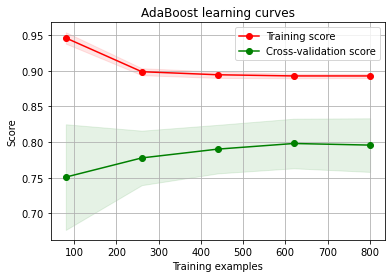

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)

# SVM

In [ ]:
from sklearn.svm import SVC
svmclf = SVC()
kfold = StratifiedKFold(n_splits=10, shuffle=True)
X = train_data.drop(["Survived"], axis=1)
y = train_data["Survived"]
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.15)

simple test for cross-validation score

In [ ]:
SvmCv = cross_val_score(svmclf, X = X, y = y, scoring = "accuracy", cv = kfold)
SvmCv.mean()

0.8282521847690386

test with default parameters

In [ ]:
svmclf.fit(X_train, y_train)
y_predict =  svmclf.predict(X_val)
cm = confusion_matrix(y_val, y_predict)
print("accuracy:",(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
print("precision:",(cm[0][0])/(cm[0][0]+cm[0][1]))
print("recall:",cm[0][0]/(cm[0][0]+cm[0][1]))

accuracy: 0.8059701492537313
precision: 0.8947368421052632
recall: 0.8947368421052632


tuning parameters

In [ ]:
svmparam = {"kernel":["linear","poly","rbf","sigmoid"]}
gridsearchclf = GridSearchCV(SVC(), param_grid = svmparam, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gridsearchclf.fit(X, y)
print(gridsearchclf.best_score_)
print(gridsearchclf.best_params_)

In [ ]:
svmparam = {"kernel":["poly","rbf"], "C":[0.1,1,10], "gamma":[0.1,1,10]}
gridsearchclf = GridSearchCV(SVC(), param_grid = svmparam, cv=kfold, scoring="accuracy", verbose = 4)
gridsearchclf.fit(X, y)
print(gridsearchclf.best_score_)
print(gridsearchclf.best_params_)

In [ ]:
svmparam = {"kernel":["rbf"], "C":[10,100,1000], "gamma":[0.001,0.01,0.1]}
gridsearchclf = GridSearchCV(SVC(), param_grid = svmparam, cv=kfold, scoring="accuracy", verbose = 1)
gridsearchclf.fit(X, y)
print(gridsearchclf.best_score_)
print(gridsearchclf.best_params_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8271535580524345
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    5.1s finished


final SVC model

In [ ]:
svmclf = SVC(C=100, gamma=0.01, kernel="rbf")
svmclf.fit(X_train, y_train)
y_predict =  svmclf.predict(X_val)
cm = confusion_matrix(y_val, y_predict)
print("accuracy:",(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
print("precision:",(cm[0][0])/(cm[0][0]+cm[0][1]))
print("recall:",cm[0][0]/(cm[0][0]+cm[0][1]))

accuracy: 0.8059701492537313
precision: 0.8947368421052632
recall: 0.8947368421052632


# Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
single_best_model = RandomForestClassifier(criterion='gini',
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=42,
                                           n_jobs=-1,
                                           verbose=1)

In [59]:
single_best_model.fit(X_train, y_train)
y_pred=single_best_model.predict(X_val)
print("Accuracy:", sklearn.metrics.accuracy_score(y_val, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    0.8s finished
Accuracy: 0.8059701492537313
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 1100 out of 1100 | elapsed:    0.0s finished


## Feature Importance

No handles with labels found to put in legend.


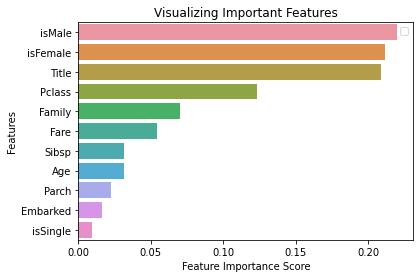

In [60]:
imp = pd.Series(single_best_model.feature_importances_,index=['Pclass', 'Age', 'Sibsp', 'Parch', 'Fare', 'Embarked', 'Title', 'isMale', 'isFemale', 'Family', 'isSingle']).sort_values(ascending=False)

sns.barplot(x=imp, y=imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Eliminate the least two important features

In [64]:
X2 = train_data.drop(['Survived', 'Parch', 'isSingle'], axis=1)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y, shuffle=True, test_size=0.15)

single_best_model.fit(X_train2, y_train2)
y_pred2=single_best_model.predict(X_val2)
print("Accuracy:", sklearn.metrics.accuracy_score(y_val2, y_pred2))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    0.8s finished
Accuracy: 0.8731343283582089
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 1100 out of 1100 | elapsed:    0.0s finished
